<a href="https://colab.research.google.com/github/IsaiasGabrielDev/RegressaoLinearA1/blob/main/Regress%C3%A3o_Linear_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Confira os Dados

In [2]:
import os
from google.colab import drive
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
housing_df = pd.concat([housing.data,housing.target], axis=1)


In [3]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Não possui colunas nulas, observa-se que um valor de população elevado na localidade causa bastante impacto no valor médio das casas, o segundo registo do database tem valores semelhantes ao demais mas devido ao valor de populacao, sofre impacto no valor médio.

In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
housing_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

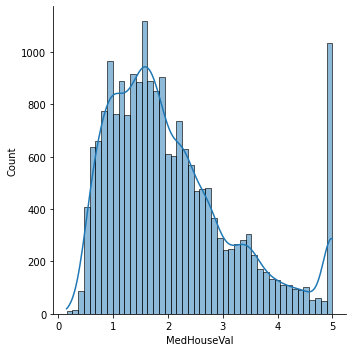

In [8]:
sns.displot(housing_df['MedHouseVal'],kde=True)

##Treinando um modelo de regressão linear

Vamos agora começar a treinar o modelo de regressão! Precisaremos primeiro dividir nossos dados em um array X que contém os recursos para treinar e um array y com a variável de destino, neste caso a coluna Price. Iremos descartar a coluna Endereço porque ela tem apenas informações de texto que o modelo de regressão linear não pode usar.

###Arrays X e y

In [9]:
X = housing_df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']]

y = housing_df['MedHouseVal']

##Train Test Split


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=125)

##Criando e Treinando o modelo

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

##Avaliação do Modelo


In [14]:
print(lm.intercept_)

-38.02203329652558


In [16]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['ValorMedio'])
coeff_df

,ValorMedio
MedInc,0.426960
HouseAge,0.009539
AveRooms,-0.096370
AveBedrms,0.577814
Population,-0.000007
AveOccup,-0.003488
Latitude,-0.437091
Longitude,-0.448676


##Previsões do nosso modelo


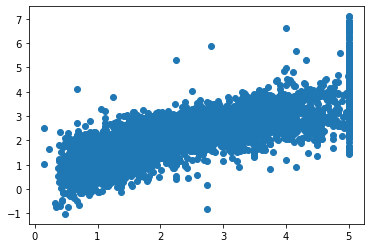

In [17]:
predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)

Observando o modelo é possivel traçar uma linha entre os menores pontos possiveis. acredito que o modelo apresentado é bom para uma possivel previsão de dados.

**Histograma Residual**

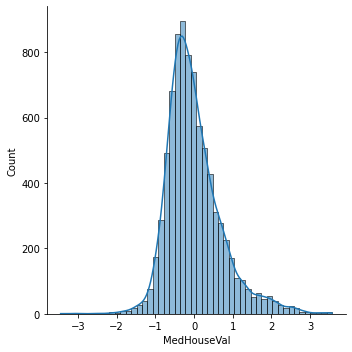

In [18]:
sns.displot((y_test-predictions),bins=50,kde=True)

##Métricas de Avaliação de Regressão

(loss functions)

In [19]:
from sklearn import metrics

In [20]:
print('MAE: ', metrics.mean_absolute_error(y_test, predictions))
print('MSE: ', metrics.mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE:  0.5314144000294646
MSE:  0.5065006770483771
RMSE:  0.7116886096098328
